In [4]:
import numpy as np

from src.io.utils import read_config
from src.models.train import load_data
from tsai.all import *

In [5]:
os.chdir("../")
config = read_config("src/conf/params.yaml")
window_size = config["processing_config"]["window_size"]

In [6]:
X_train_raw, y_train_raw = load_data(config, mode="train")
X_test_raw, y_test_raw = load_data(config, mode="test")

X_train = X_train_raw.to_numpy()
X_test = X_test_raw.to_numpy()

X_train = TSUnwindowedDataset(X_train, window_size=window_size, stride=window_size)[:][0].data
X_test = TSUnwindowedDataset(X_test, window_size=window_size, stride=window_size)[:][0].data

y_train = np.asarray(y_train_raw).squeeze(1)
y_test = np.asarray(y_test_raw).squeeze(1)

In [7]:
X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

In [8]:
tfms = [None, TSClassification()]
batch_tfms = [TSStandardize(by_sample=True, use_single_batch=False)]
learn = TSClassifier(X, y, splits=splits, bs=64, tfms=tfms, batch_tfms=batch_tfms, metrics=[F1Score(), accuracy], arch=InceptionTimePlus, arch_config=dict(fc_dropout=.5),
                     train_metrics=True)

In [27]:
learn.fit_one_cycle(50)

epoch,train_loss,train_f1_score,train_accuracy,valid_loss,valid_f1_score,valid_accuracy,time
0,0.755540,0.304083,0.518630,0.525560,0.012876,0.886026,00:07
1,0.721152,0.473149,0.563702,0.547378,0.246683,0.810084,00:07
2,0.695590,0.588589,0.588341,0.578724,0.262899,0.702676,00:07
3,0.672461,0.644366,0.635817,0.584863,0.221898,0.669846,00:07
4,0.653389,0.643114,0.641827,0.497297,0.218036,0.758300,00:07
5,0.629667,0.687095,0.680889,0.658144,0.208309,0.660059,00:07
6,0.609548,0.711722,0.710337,0.514676,0.227888,0.759911,00:07
7,0.593799,0.703400,0.695913,0.581732,0.167697,0.733152,00:07
8,0.576109,0.720284,0.715745,0.838412,0.209635,0.548811,00:07
9,0.558191,0.732279,0.725361,0.833263,0.196904,0.588702,00:07


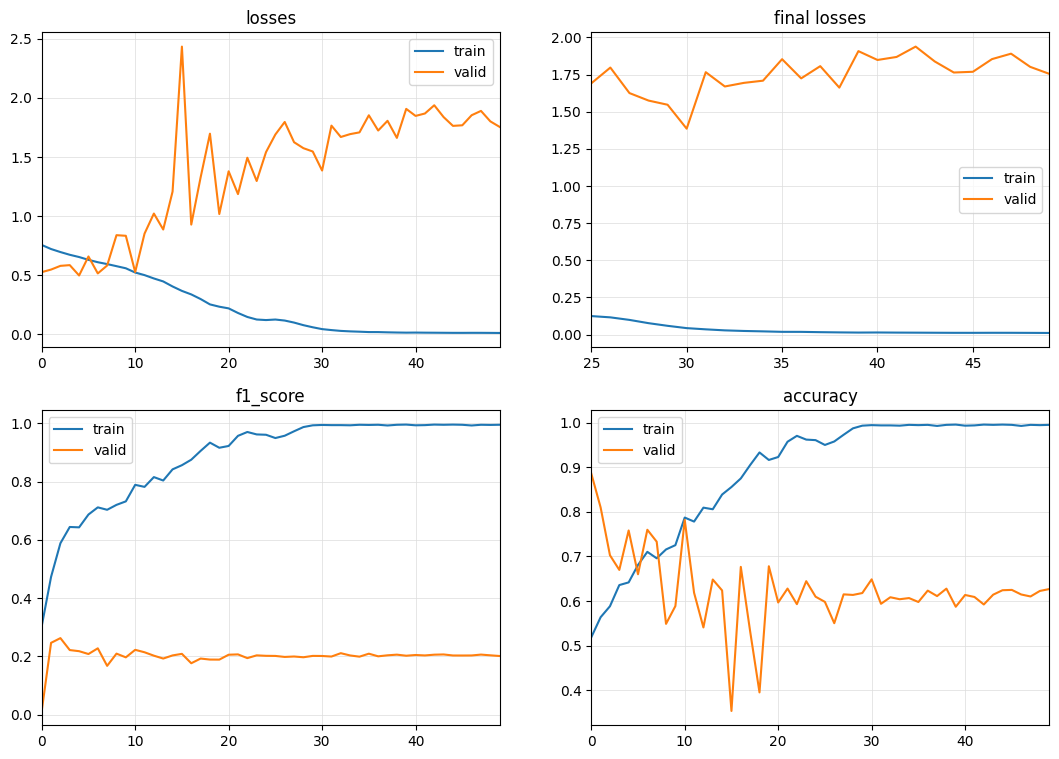

In [28]:
learn.plot_metrics()